In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

### Feature Importance

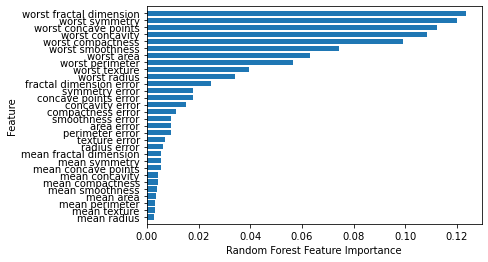

In [22]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

def plot_feature_importances (model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(rf)

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0 )

X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
y_train = pd.DataFrame(y_train)

In [24]:
rf = RandomForestClassifier(n_jobs=1, random_state=1)
rf.fit(X_train, y_train)
features = X_train.columns.values

<ipython-input-24-d25b294c042e>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### 산점도로 Feature Importance 나타내기

In [25]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features, 
    mode = 'markers',
    marker=dict(
        sizemode='diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=features
)

data = [trace] 

layout = go.Layout(
    autosize=True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
     xaxis=dict(
         ticklen=5,
         showgrid=False,
         zeroline=False,
         showline=False
     ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2010')

### Bar그래프로 Feature Importance 나타내기

In [26]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse=False)))
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature Importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature Importances',
    width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')